In [1]:
import zipfile
import os

# Path to the uploaded zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/archive.zip'

# Path to unzip the file
unzip_dir = '/content/drive/MyDrive/dataset/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"Dataset unzipped to {unzip_dir}")

Dataset unzipped to /content/drive/MyDrive/dataset/


In [2]:
import os

# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/dataset/'

# Check if the folder exists
if os.path.exists(dataset_path):
    print(f"Dataset folder found at: {dataset_path}")
    # List the contents of the folder
    print("Contents of the dataset folder:", os.listdir(dataset_path))
else:
    print(f"Dataset folder not found at: {dataset_path}")


Dataset folder found at: /content/drive/MyDrive/dataset/
Contents of the dataset folder: ['annotations', 'images']


In [3]:
# Check contents of 'annotations' and 'images' folders
annotations_path = os.path.join(dataset_path, "annotations")
images_path = os.path.join(dataset_path, "images")

# List files in annotations
if os.path.exists(annotations_path):
    print(f"'annotations' folder found with contents: {os.listdir(annotations_path)}")
else:
    print("'annotations' folder not found!")

# List files in images
if os.path.exists(images_path):
    print(f"'images' folder found with contents: {os.listdir(images_path)}")
else:
    print("'images' folder not found!")


'annotations' folder found with contents: ['Cars0.xml', 'Cars1.xml', 'Cars10.xml', 'Cars100.xml', 'Cars101.xml', 'Cars102.xml', 'Cars103.xml', 'Cars104.xml', 'Cars105.xml', 'Cars106.xml', 'Cars107.xml', 'Cars108.xml', 'Cars109.xml', 'Cars11.xml', 'Cars110.xml', 'Cars111.xml', 'Cars112.xml', 'Cars113.xml', 'Cars114.xml', 'Cars115.xml', 'Cars116.xml', 'Cars117.xml', 'Cars118.xml', 'Cars119.xml', 'Cars12.xml', 'Cars120.xml', 'Cars121.xml', 'Cars122.xml', 'Cars123.xml', 'Cars124.xml', 'Cars125.xml', 'Cars126.xml', 'Cars127.xml', 'Cars128.xml', 'Cars129.xml', 'Cars13.xml', 'Cars130.xml', 'Cars131.xml', 'Cars132.xml', 'Cars133.xml', 'Cars134.xml', 'Cars135.xml', 'Cars136.xml', 'Cars137.xml', 'Cars138.xml', 'Cars139.xml', 'Cars14.xml', 'Cars140.xml', 'Cars141.xml', 'Cars142.xml', 'Cars143.xml', 'Cars144.xml', 'Cars145.xml', 'Cars146.xml', 'Cars147.xml', 'Cars148.xml', 'Cars149.xml', 'Cars15.xml', 'Cars150.xml', 'Cars151.xml', 'Cars152.xml', 'Cars153.xml', 'Cars154.xml', 'Cars155.xml', 'Cars15

Annotations Path: /content/drive/MyDrive/dataset/annotations
Images Path: /content/drive/MyDrive/dataset/images
Labels Path (for YOLO): /content/drive/MyDrive/dataset/labels
Sample Annotation: Cars0.xml
Sample Image: Cars0.png


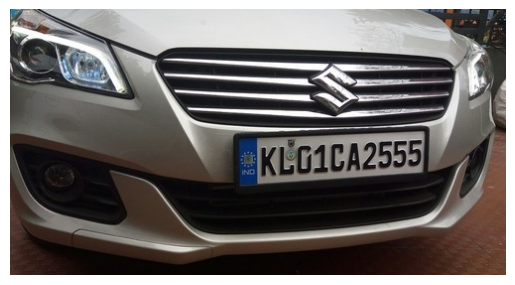

In [4]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Paths to dataset folders
annotations_path = os.path.join(dataset_path, "annotations")
images_path = os.path.join(dataset_path, "images")

# Output directory for YOLO annotations
labels_path = os.path.join(dataset_path, "labels")
os.makedirs(labels_path, exist_ok=True)  # Create 'labels' folder if it doesn't exist

print(f"Annotations Path: {annotations_path}")
print(f"Images Path: {images_path}")
print(f"Labels Path (for YOLO): {labels_path}")

# List a sample annotation and image
sample_annotation_file = os.listdir(annotations_path)[0] if os.listdir(annotations_path) else None
sample_image_file = os.listdir(images_path)[0] if os.listdir(images_path) else None

print(f"Sample Annotation: {sample_annotation_file}")
print(f"Sample Image: {sample_image_file}")

# Display the sample image (optional)
if sample_image_file:
    sample_image_path = os.path.join(images_path, sample_image_file)
    img = cv2.imread(sample_image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("No sample image found!")


In [5]:
# Print the first few lines of a sample annotation file
sample_annotation_path = os.path.join(annotations_path, sample_annotation_file)
with open(sample_annotation_path, "r") as f:
    print(f"Sample Annotation Content:\n{f.read()}")

# Example classes file
classes = ["car", "license_plate"]  # Update with your classes
classes_file_path = os.path.join(dataset_path, "classes.txt")
with open(classes_file_path, "w") as f:
    for cls in classes:
        f.write(cls + "\n")

print(f"Classes file created at: {classes_file_path}")


Sample Annotation Content:

<annotation>
    <folder>images</folder>
    <filename>Cars0.png</filename>
    <size>
        <width>500</width>
        <height>268</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>licence</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>226</xmin>
            <ymin>125</ymin>
            <xmax>419</xmax>
            <ymax>173</ymax>
        </bndbox>
    </object>
</annotation>
Classes file created at: /content/drive/MyDrive/dataset/classes.txt


In [6]:
class_names = ['car', 'licence']  # Updated to match the annotation class name

import os
import xml.etree.ElementTree as ET

# Path to your annotations folder
annotations_path = '/content/drive/MyDrive/dataset/annotations'

# List all XML files in the annotations folder
xml_files = [f for f in os.listdir(annotations_path) if f.endswith('.xml')]

# Print out all class names found in the annotations
for xml_file in xml_files[:10]:  # Print the first 10 files for inspection
    xml_path = os.path.join(annotations_path, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        print(f"Class name in {xml_file}: {class_name}")


Class name in Cars0.xml: licence
Class name in Cars1.xml: licence
Class name in Cars10.xml: licence
Class name in Cars100.xml: licence
Class name in Cars101.xml: licence
Class name in Cars102.xml: licence
Class name in Cars103.xml: licence
Class name in Cars103.xml: licence
Class name in Cars104.xml: licence
Class name in Cars105.xml: licence
Class name in Cars106.xml: licence
Class name in Cars106.xml: licence
Class name in Cars106.xml: licence
Class name in Cars106.xml: licence


In [7]:
import os
import xml.etree.ElementTree as ET

annotations_path = '/content/drive/MyDrive/dataset/annotations/'  # Path to your annotations folder
class_names = ['car', 'licence']  # This is your list of class names (update accordingly)

# Check class names in XML files
for xml_file in os.listdir(annotations_path):
    if xml_file.endswith('.xml'):
        tree = ET.parse(os.path.join(annotations_path, xml_file))
        root = tree.getroot()

        for obj in root.findall('object'):
            class_name = obj.find('name').text
            print(f"Class name in {xml_file}: {class_name}")


Class name in Cars0.xml: licence
Class name in Cars1.xml: licence
Class name in Cars10.xml: licence
Class name in Cars100.xml: licence
Class name in Cars101.xml: licence
Class name in Cars102.xml: licence
Class name in Cars103.xml: licence
Class name in Cars103.xml: licence
Class name in Cars104.xml: licence
Class name in Cars105.xml: licence
Class name in Cars106.xml: licence
Class name in Cars106.xml: licence
Class name in Cars106.xml: licence
Class name in Cars106.xml: licence
Class name in Cars107.xml: licence
Class name in Cars108.xml: licence
Class name in Cars109.xml: licence
Class name in Cars11.xml: licence
Class name in Cars110.xml: licence
Class name in Cars111.xml: licence
Class name in Cars112.xml: licence
Class name in Cars113.xml: licence
Class name in Cars114.xml: licence
Class name in Cars115.xml: licence
Class name in Cars116.xml: licence
Class name in Cars117.xml: licence
Class name in Cars118.xml: licence
Class name in Cars119.xml: licence
Class name in Cars12.xml: 

In [8]:
import os
import xml.etree.ElementTree as ET

# Update this path if necessary
annotations_path = '/content/drive/MyDrive/dataset/annotations'  # Path to your annotations (XML files)
labels_path = '/content/drive/MyDrive/dataset/labels/train'  # Path to save YOLO labels
class_names = ['car', 'licence']  # Class names (ensure they match)

# Make sure labels directory exists
if not os.path.exists(labels_path):
    os.makedirs(labels_path)

# Iterate over each XML file and process it
for xml_file in os.listdir(annotations_path):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(annotations_path, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Get the corresponding image filename
        image_filename = root.find('filename').text
        print(f"Processing image: {image_filename}")

        # Open the corresponding label file
        label_file = os.path.join(labels_path, f"{os.path.splitext(image_filename)[0]}.txt")
        with open(label_file, 'w') as f:
            # Process each object in the annotation
            for obj in root.findall('object'):
                class_name = obj.find('name').text  # e.g., 'car' or 'license_plate'
                print(f"Class name: {class_name}")  # Debugging statement
                if class_name not in class_names:
                    print(f"Skipping class: {class_name}")  # Debugging statement
                    continue  # Skip if class name is not in the defined list

                # Get the class ID
                class_id = class_names.index(class_name)

                # Bounding box coordinates
                bndbox = obj.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                print(f"Bounding box: ({xmin}, {ymin}), ({xmax}, {ymax})")  # Debugging statement

                # Convert to YOLO format (normalized center_x, center_y, width, height)
                img_width = int(root.find('size/width').text)
                img_height = int(root.find('size/height').text)

                # YOLO format: class_id center_x center_y width height (all normalized)
                center_x = (xmin + xmax) / 2 / img_width
                center_y = (ymin + ymax) / 2 / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                # Write the label to the file
                f.write(f"{class_id} {center_x} {center_y} {width} {height}\n")


        print(f"Processed label for {xml_file}")


Processing image: Cars0.png
Class name: licence
Bounding box: (226, 125), (419, 173)
Processed label for Cars0.xml
Processing image: Cars1.png
Class name: licence
Bounding box: (134, 128), (262, 160)
Processed label for Cars1.xml
Processing image: Cars10.png
Class name: licence
Bounding box: (140, 5), (303, 148)
Processed label for Cars10.xml
Processing image: Cars100.png
Class name: licence
Bounding box: (175, 114), (214, 131)
Processed label for Cars100.xml
Processing image: Cars101.png
Class name: licence
Bounding box: (167, 202), (240, 220)
Processed label for Cars101.xml
Processing image: Cars102.png
Class name: licence
Bounding box: (66, 147), (322, 199)
Processed label for Cars102.xml
Processing image: Cars103.png
Class name: licence
Bounding box: (230, 129), (248, 134)
Class name: licence
Bounding box: (189, 116), (202, 121)
Processed label for Cars103.xml
Processing image: Cars104.png
Class name: licence
Bounding box: (195, 266), (244, 282)
Processed label for Cars104.xml
Proc

In [9]:
import random
import shutil
import os

# Paths
dataset_path = '/content/drive/MyDrive/dataset'  # Update to the correct path
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

# Define directories for the splits
train_images_path = os.path.join(images_path, "train")
test_images_path = os.path.join(images_path, "test")
train_labels_path = os.path.join(labels_path, "train")
test_labels_path = os.path.join(labels_path, "test")

# Create directories if they don't exist
for path in [train_images_path, test_images_path, train_labels_path, test_labels_path]:
    os.makedirs(path, exist_ok=True)

# Get all image filenames (assumes images are .jpg, .png, or .jpeg)
image_files = [f for f in os.listdir(images_path) if f.endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(image_files)

# Split into train (70%) and test (30%)
train_split = int(0.7 * len(image_files))
train_files = image_files[:train_split]
test_files = image_files[train_split:]

# Function to move images and corresponding labels
def move_files(image_files, dest_images_path, dest_labels_path):
    for image_file in image_files:
        # Move image
        src_image_path = os.path.join(images_path, image_file)
        dst_image_path = os.path.join(dest_images_path, image_file)
        shutil.copy(src_image_path, dst_image_path)

        # Move corresponding label
        label_file = image_file.replace(".jpg", ".txt").replace(".png", ".txt").replace(".jpeg", ".txt")
        src_label_path = os.path.join(labels_path, label_file)
        if os.path.exists(src_label_path):
            dst_label_path = os.path.join(dest_labels_path, label_file)
            shutil.copy(src_label_path, dst_label_path)

# Move files into respective directories
move_files(train_files, train_images_path, train_labels_path)
move_files(test_files, test_images_path, test_labels_path)

print(f"Dataset organized with 70% training and 30% testing in:\n{dataset_path}")


Dataset organized with 70% training and 30% testing in:
/content/drive/MyDrive/dataset


In [11]:
# Check train folder
print(f"Training images: {len(os.listdir(train_images_path))}")
print(f"Training labels: {len(os.listdir(train_labels_path))}")


# Check test folder
print(f"Test images: {len(os.listdir(test_images_path))}")
print(f"Test labels: {len(os.listdir(test_labels_path))}")

Training images: 303
Training labels: 433
Test images: 130
Test labels: 0


In [12]:
# Path to the classes.txt file
classes_file_path = os.path.join(dataset_path, "classes.txt")

# Read class names
with open(classes_file_path, "r") as file:
    class_names = [line.strip() for line in file.readlines()]

print(f"Class names: {class_names}")

Class names: ['car', 'license_plate']


In [18]:
# Create the correct dataset.yaml content
yaml_content = """
# YOLO dataset configuration
train: /content/drive/MyDrive/dataset/images/train
val: /content/drive/MyDrive/dataset/images/train  # Reusing train data
test: /content/drive/MyDrive/dataset/images/test

# Number of classes
nc: 2  # Number of unique classes

# Class names
names: ['car', 'license_plate']
"""

# Define the path where the file should be saved
yaml_file_path = '/content/drive/MyDrive/dataset.yaml'

# Write the content to the dataset.yaml file
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)

print(f"Dataset configuration file created at: {yaml_file_path}")


Dataset configuration file created at: /content/drive/MyDrive/dataset.yaml


In [14]:
%cd /content/drive/MyDrive/
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5


/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.09 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/content/drive/MyDrive/yolov5


In [19]:
!python /content/drive/MyDrive/yolov5/train.py --img 640 --batch 16 --epochs 70 --data /content/drive/MyDrive/dataset.yaml --weights yolov5l.pt --cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-26 23:44:46.412709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-26 23:44:46.433289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-26 23:44:46.439608: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: choudary770 (choudary770-university-of-management-technology). Use `wandb login --relogin` to force relogin
train: weights=yolov5l.pt, cfg=, data=/content/drive/MyDrive/data

In [21]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/dataset/images/test/


detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/130 /content/drive/MyDrive/dataset/images/test/Cars102.png: 512x640 1 license_plate, 42.2ms
image 2/130 /content/drive/MyDrive/dataset/images/test/Cars104.png: 480x640 2 license_plates, 100.3ms
image 3/130 /

In [22]:
!cat /content/drive/MyDrive/yolov5/runs/train/exp2/results.csv


               epoch,      train/box_loss,      train/obj_loss,      train/cls_loss,   metrics/precision,      metrics/recall,     metrics/mAP_0.5,metrics/mAP_0.5:0.95,        val/box_loss,        val/obj_loss,        val/cls_loss,               x/lr0,               x/lr1,               x/lr2
                   0,             0.10633,            0.028777,            0.024103,           0.0021746,             0.50602,            0.034918,           0.0093097,            0.082559,            0.019428,            0.014711,              0.0838,              0.0018,              0.0018
                   1,            0.083214,            0.025133,           0.0090223,            0.029399,             0.49096,            0.023246,           0.0057198,            0.090757,            0.013934,           0.0029858,            0.066648,           0.0036477,           0.0036477
                   2,            0.080559,            0.019626,           0.0037358,             0.21277,             

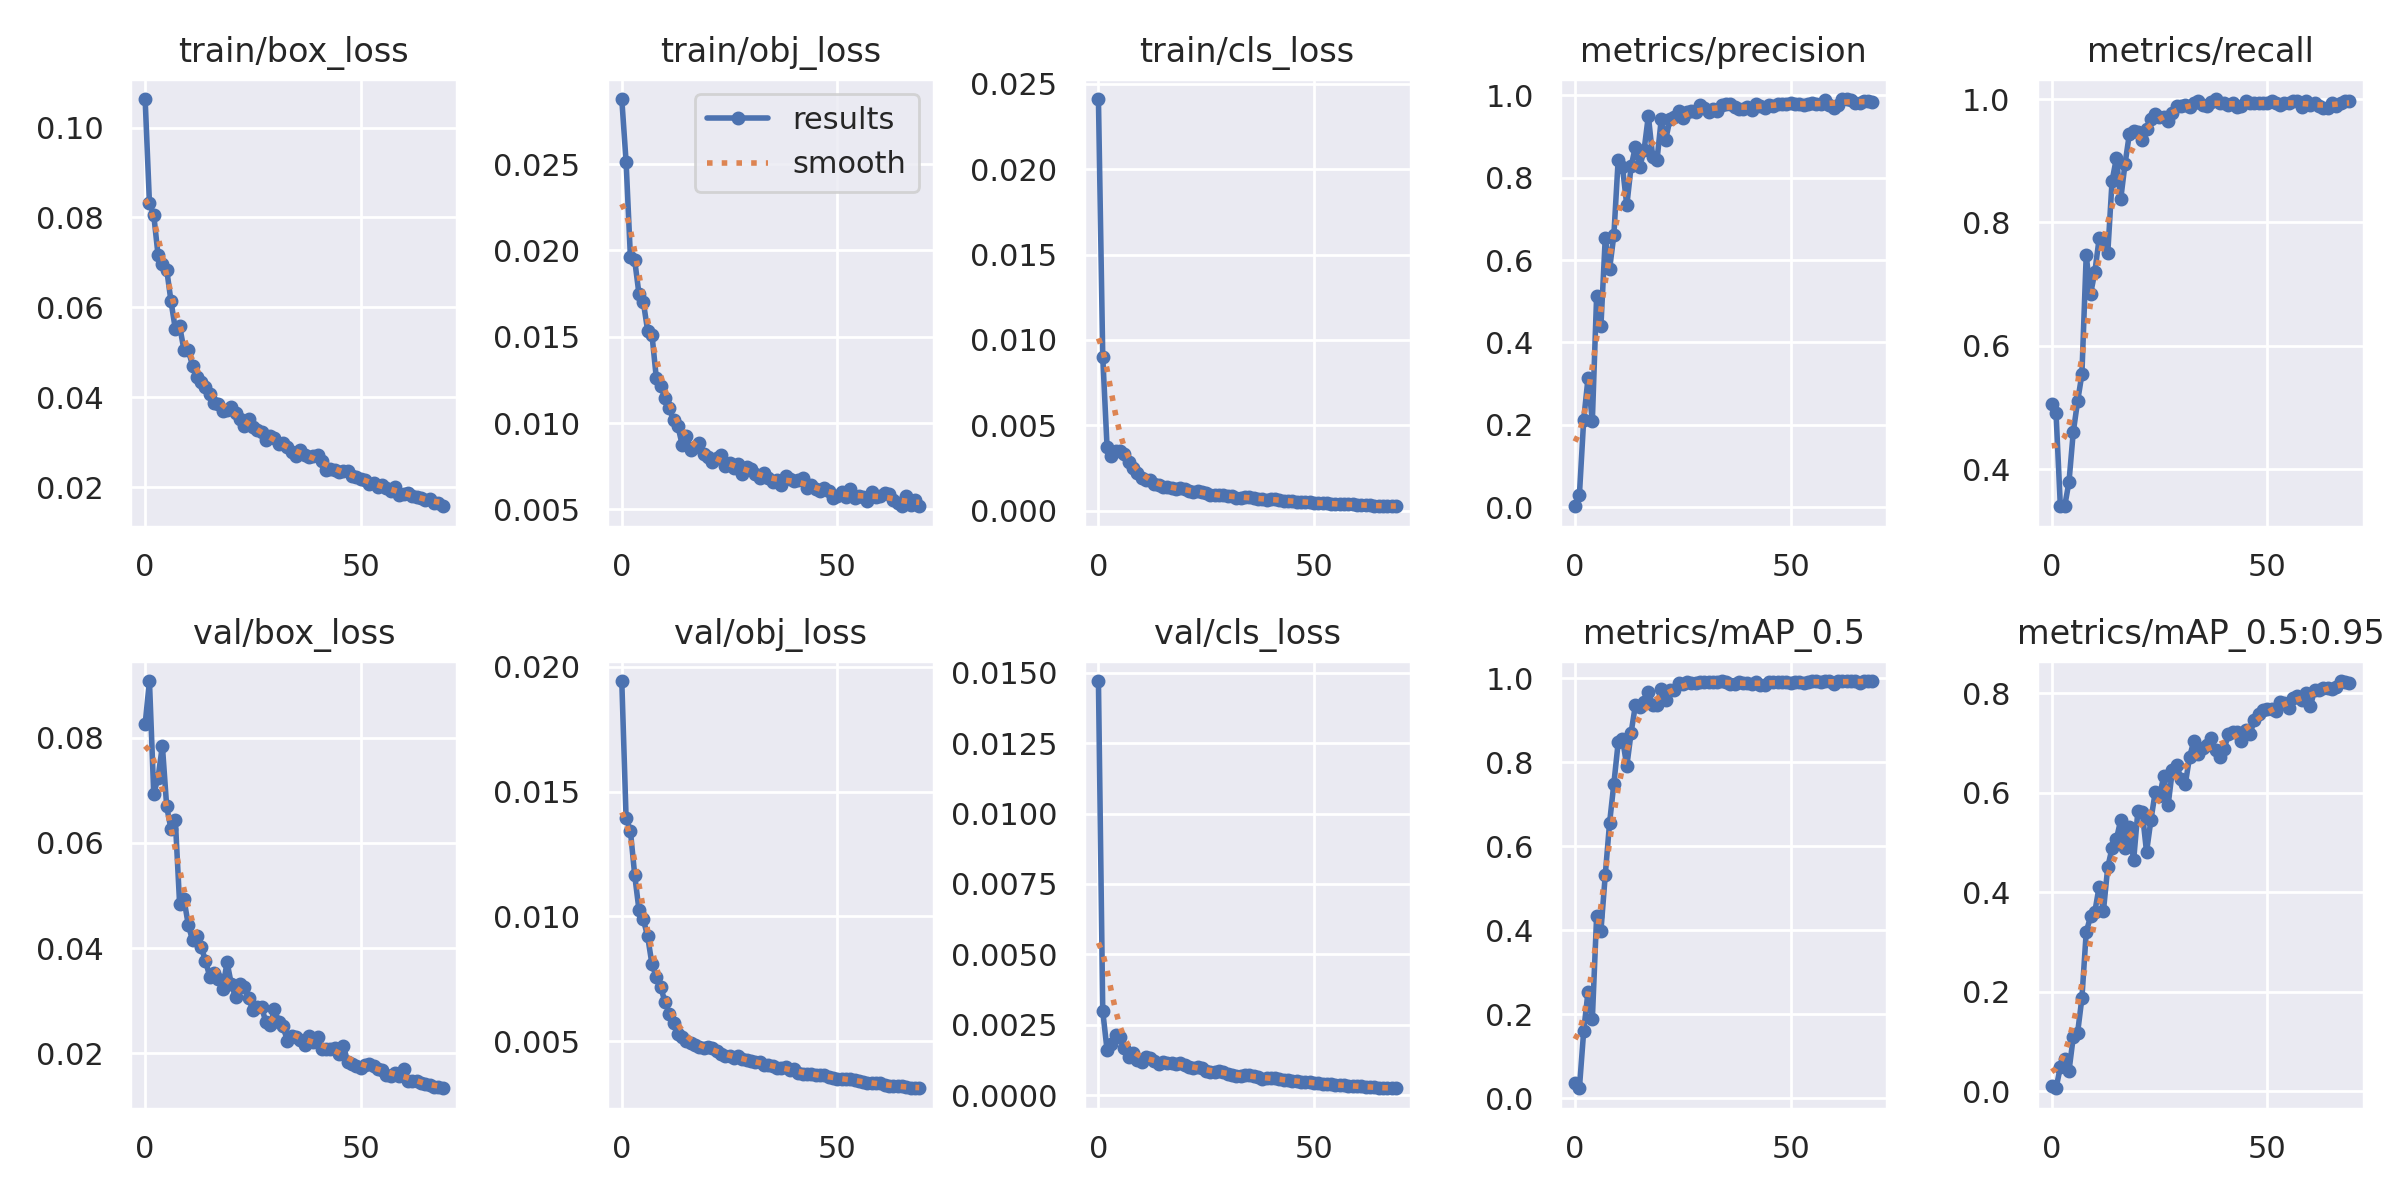

In [24]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/yolov5/runs/train/exp2/results.png')


In [25]:
import shutil

# Path to the yolov5 folder in your Google Drive
yolov5_folder = '/content/drive/MyDrive/yolov5'

# Path to the destination zip file
zip_file = '/content/drive/MyDrive/yolov5_backup.zip'

# Create a zip archive of the yolov5 folder
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', yolov5_folder)


'/content/drive/MyDrive/yolov5_backup.zip'

In [26]:
from google.colab import files

# Download the zip file to your local system
files.download(zip_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>